In [16]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio

R = 1
u, v = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
x = R*np.cos(u)*np.sin(v)
y = R*np.sin(u)*np.sin(v)
z = R*np.cos(v)

# --- Sphere ---
sphere = go.Surface(
    x=x, y=y, z=z,
    colorscale='RdBu', showscale=False,
    opacity=1.0
)

# --- Tangent plane (behind) ---
plane_extent = 1.2
xx, yy = np.meshgrid(np.linspace(-plane_extent, plane_extent, 30),
                     np.linspace(-plane_extent, plane_extent, 30))
zz = -1.0 * np.ones_like(xx)

plane = go.Surface(
    x=xx, y=yy, z=zz,
    colorscale=[[0, 'lightcoral'], [1, 'lightcoral']],
    showscale=False, opacity=1.0
)

# --- Figure setup ---
fig = go.Figure(data=[plane, sphere])

fig.update_layout(
    scene=dict(
        aspectmode='cube',
        xaxis=dict(backgroundcolor='white', gridcolor='lightgray', showbackground=True),
        yaxis=dict(backgroundcolor='white', gridcolor='lightgray', showbackground=True),
        zaxis=dict(backgroundcolor='white', gridcolor='lightgray', showbackground=True),
    ),
    paper_bgcolor='white',  # outer background
    plot_bgcolor='white'    # 2D plot background (for completeness)
)

# --- Save as white-background SVG ---
pio.write_image(fig, "Ch2/images/SpherePlane.jpg")

# --- Show interactive view ---
fig.show()


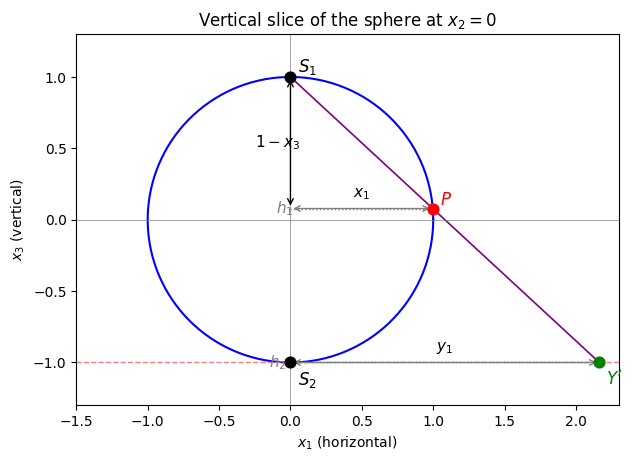

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Sphere radius
R = 1

# =====================================================
# Figure 2: Vertical slice (x₂ = 0)
# =====================================================
fig2 = plt.figure(figsize=(7, 6))
ax2 = fig2.add_subplot(111)

# Parameterize the circle in the x₁–x₃ plane
t = np.linspace(0, 2 * np.pi, 400)
x1_circle = R * np.cos(t)
x3_circle = R * np.sin(t)

# Plot circle (sphere cross-section)
ax2.plot(x1_circle, x3_circle, color='blue', linewidth=1.5)

# --- Define key points ---
S1 = (0, 1)    # North pole (x₁, x₃)
S2 = (0, -1)   # South pole
theta_p = 0.1 * np.pi / 4  # 45° down-right
P = (R * np.cos(theta_p), R * np.sin(theta_p))  # point on circle

# --- Compute intersection of line S1→P with tangent plane x₃ = -1 ---
t_intersect = (-1 - S1[1]) / (P[1] - S1[1])
Yp = (S1[0] + t_intersect * (P[0] - S1[0]), -1)  # intersection (Y′)

# --- Plot points ---
ax2.scatter(*S1, color='black', s=60, zorder=5)
ax2.scatter(*S2, color='black', s=60, zorder=5)
ax2.scatter(*P, color='red', s=60, zorder=5)
ax2.scatter(*Yp, color='green', s=60, zorder=5)

# --- Draw lines ---
# Tangent plane (horizontal line at x₃ = -1)
ax2.axhline(-1, color='lightcoral', linestyle='--', linewidth=1)

# Line S1→P (extend until Y′)
ax2.plot([S1[0], Yp[0]], [S1[1], Yp[1]], color='purple', linestyle='-', linewidth=1.2)

# Projection lines from P and Y′ to x₃-axis
ax2.plot([0, P[0]], [P[1], P[1]], color='gray', linestyle=':', linewidth=1)
ax2.plot([0, Yp[0]], [Yp[1], Yp[1]], color='gray', linestyle=':', linewidth=1)

# --- Labels for key points ---
ax2.text(S1[0] + 0.05, S1[1], r"$S_1$", fontsize=12, va='bottom')
ax2.text(S2[0] + 0.05, S2[1] - 0.05, r"$S_2$", fontsize=12, va='top')
ax2.text(P[0] + 0.05, P[1], r"$P$", fontsize=12, color='red', va='bottom')
ax2.text(Yp[0] + 0.05, Yp[1] - 0.05, r"$Y'$", fontsize=12, color='green', va='top')

# --- h₁ and h₂ markers on x₃-axis ---
ax2.text(-0.1, P[1], r"$h_1$", fontsize=11, color='gray', va='center')
ax2.text(-0.15, Yp[1], r"$h_2$", fontsize=11, color='gray', va='center')

# --- Distance annotations ---
# 1. Between h₁ and S₁ → (1 - x₃)
ax2.annotate(
    "", xy=(0, S1[1]), xytext=(0, P[1]),
    arrowprops=dict(arrowstyle='<->', color='black', lw=1)
)
ax2.text(-0.25, (S1[1] + P[1]) / 2, r"$1 - x_3$", fontsize=11, va='center', rotation=0)

# 2. Between h₁ and P → (x₁)
ax2.annotate(
    "", xy=(P[0], P[1]), xytext=(0, P[1]),
    arrowprops=dict(arrowstyle='<->', color='gray', lw=1)
)
ax2.text(P[0] / 2, P[1] + 0.05, r"$x_1$", fontsize=11, va='bottom', ha='center')

# 3. Between h₂ and Y′ → (y₁)
ax2.annotate(
    "", xy=(Yp[0], Yp[1]), xytext=(0, Yp[1]),
    arrowprops=dict(arrowstyle='<->', color='gray', lw=1)
)
ax2.text(Yp[0] / 2, Yp[1] + 0.05, r"$y_1$", fontsize=11, va='bottom', ha='center')

# Axes
ax2.axhline(0, color='gray', linewidth=0.5)
ax2.axvline(0, color='gray', linewidth=0.5)

# Labels and formatting
ax2.set_xlabel(r"$x_1$ (horizontal)")
ax2.set_ylabel(r"$x_3$ (vertical)")
ax2.set_aspect('equal', 'box')
ax2.set_xlim(-1.5, 2.3
             )
ax2.set_ylim(-1.3, 1.3)
ax2.set_title(r"Vertical slice of the sphere at $x_2 = 0$")

# Save as image
plt.savefig("Ch2/images/CircleSection.jpg", format='jpg', dpi=300, bbox_inches='tight')
plt.show()


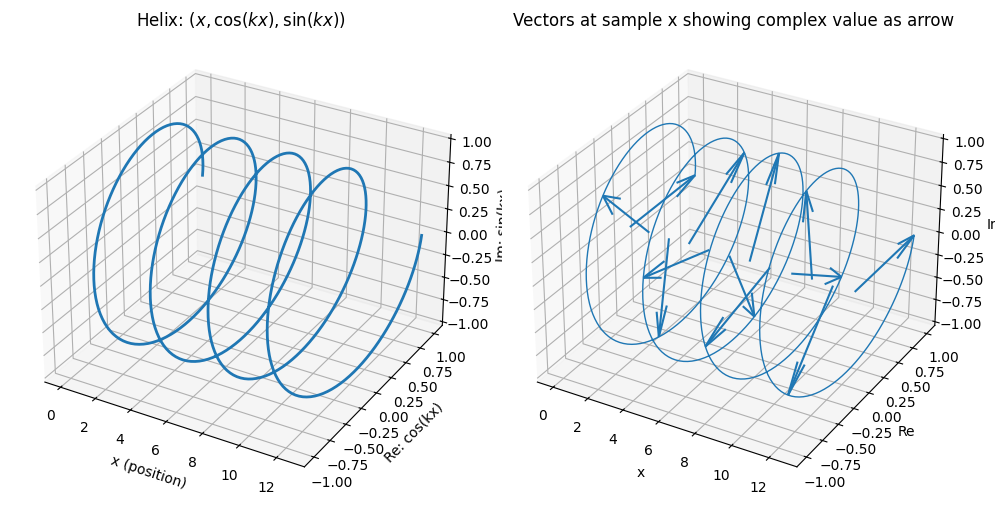

In [1]:
# save as plot_eikx_3d.py and run: python plot_eikx_3d.py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # registers 3D projection

k = 2.0           # wave number (change to see effect)
x = np.linspace(0, 4*np.pi, 400)
y = np.cos(k*x)   # Re
z = np.sin(k*x)   # Im

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection='3d')
ax.plot(x, y, z, lw=2)
ax.set_xlabel('x (position)')
ax.set_ylabel('Re: cos(kx)')
ax.set_zlabel('Im: sin(kx)')
ax.set_title(r'Helix: $(x,\cos(kx),\sin(kx))$')

# show vectors at a few x positions
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot(x, y, z, lw=1)
sample_ix = np.linspace(0, len(x)-1, 12, dtype=int)
for i in sample_ix:
    ax2.plot([x[i], x[i]], [0,0], [0,0], alpha=0)  # anchor (not visible)
    ax2.quiver(x[i], 0, 0, 0, y[i], z[i], length=1.0, normalize=False)
ax2.set_xlabel('x')
ax2.set_ylabel('Re')
ax2.set_zlabel('Im')
ax2.set_title('Vectors at sample x showing complex value as arrow')

plt.tight_layout()
plt.show()
